In [38]:
import numpy as np, matplotlib.pyplot as plt
from scipy import signal

data = np.loadtxt("eeg-data.txt")
print(data)
print(data.shape)

[-31.14010682 -29.30774113 -27.70228296 ...  29.30581425  28.57226907
  22.61510519]
(3000,)


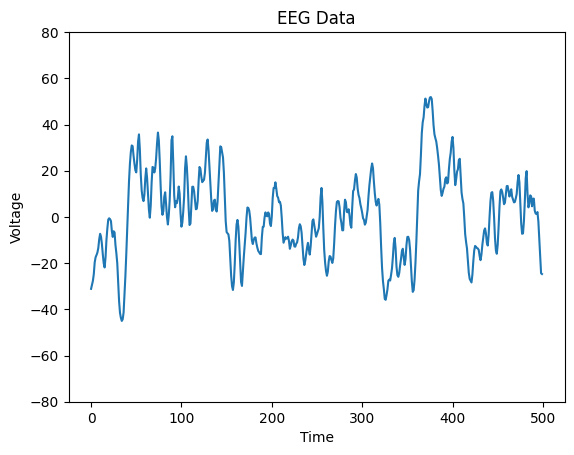

In [39]:
#Plot the data

plt.plot(data[:500])
plt.ylim(-80, 80)
plt.xlabel("Time")
plt.ylabel("Voltage")
plt.title("EEG Data")
plt.show()

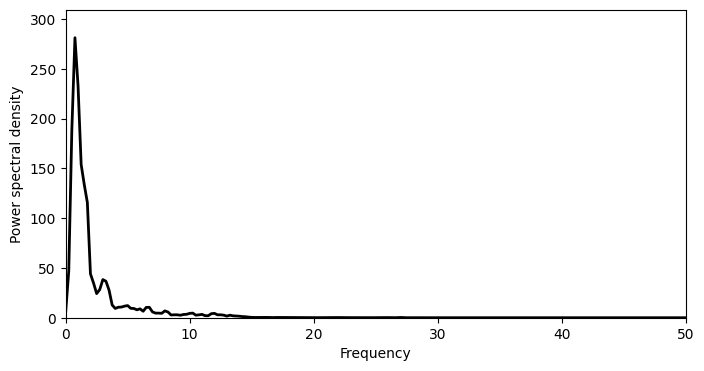

In [40]:
sampling_freq = 100
win = 4 * sampling_freq
freq, psd = signal.welch(data, 100, nperseg=win)

np.savetxt("eeg-psd.txt", np.transpose([freq, psd]))

plt.figure(figsize=(8, 4))
plt.plot(freq, psd, color="k", lw=2)
plt.xlabel("Frequency")
plt.ylabel("Power spectral density")
plt.ylim([0, psd.max() * 1.1])
plt.xlim([0, freq.max()])
plt.show()

In [42]:
def bandpower(low,high):
    idx = np.logical_and(freq >= low, freq <= high)
    return np.trapz(psd[idx], freq[idx]) 

lowest = freq.min()
highest = freq.max()

bands = {"delta": (0.5, 4), "theta": (4, 8), "alpha": (8, 13), "beta": (13, 30)}
total_bandpower = bandpower(lowest, highest)
print(f"Total bandpower: {total_bandpower}")
bandpowers = {band: bandpower(low, high) for band, (low, high) in bands.items()}
for band, power in bandpowers.items():
    print(f"{band} bandpower: \t{power}\t relative: {power/total_bandpower}")

Total bandpower: 407.2166100537179
delta bandpower: 	315.79078343769515	 relative: 0.7754860082844796
theta bandpower: 	33.88125981539633	 relative: 0.08320205752640318
alpha bandpower: 	16.62007991370214	 relative: 0.040813855582928465
beta bandpower: 	4.774541587858596	 relative: 0.011724820328985999
Max bandpower is:  delta
